<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/convolutional-filters-edge-detection/12_Gaussian_Blur_for_other_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

%matplotlib inline

!git clone -l -s https://github.com/bttrung/CVND-udacity-facebook-scholarship.git
%cd cloned-repo
!ls

Cloning into 'CVND-udacity-facebook-scholarship'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (541/541), done.
remote: Total 551 (delta 52), reused 435 (delta 6), pack-reused 0
Receiving objects: 100% (551/551), 57.23 MiB | 44.19 MiB/s, done.
Resolving deltas: 100% (52/52), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
CVND-udacity-facebook-scholarship  sample_data


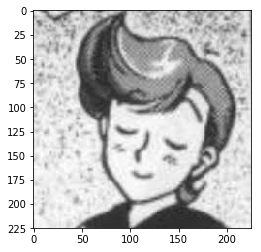

In [2]:
img_url = 'CVND-udacity-facebook-scholarship/convolutional-filters-edge-detection/images/child.jpeg'
image = mpimg.imread(img_url)
plt.imshow(image)

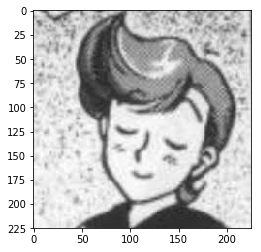

In [3]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

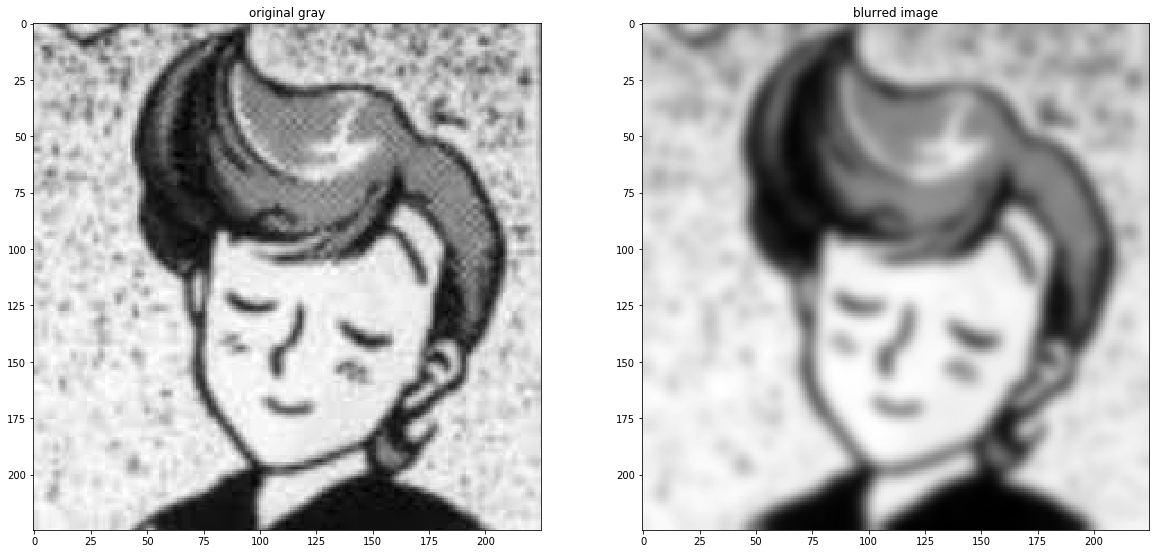

In [10]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

## Test performance with high-pass filter

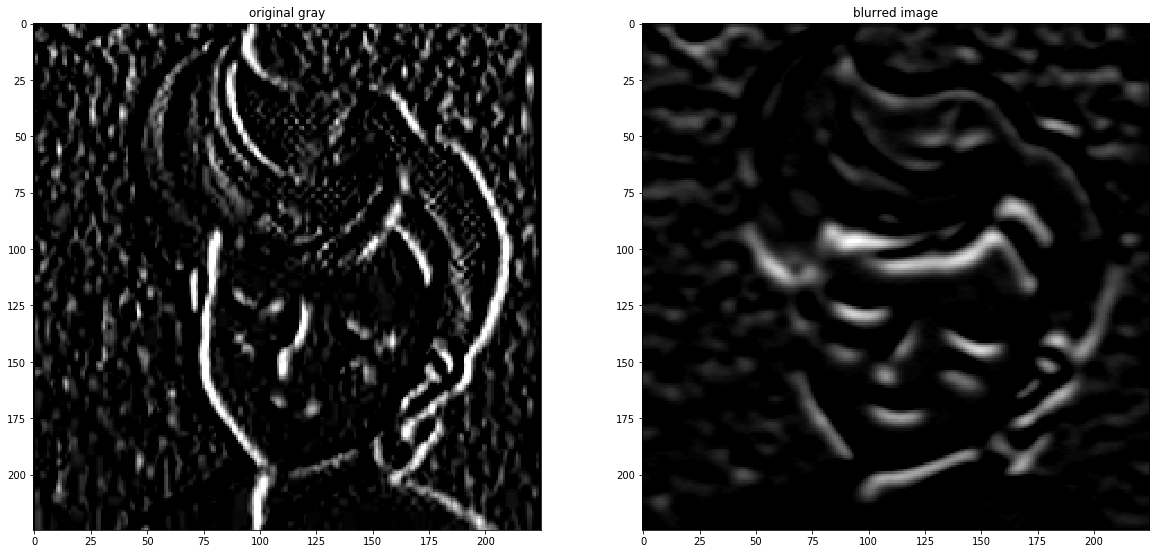

In [11]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

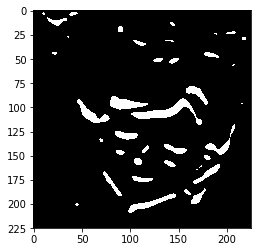

In [12]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')